In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

Voor een beter weergave voor functies zoals `describe()` van pandas.

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('precision', 2)

Dataset inladen. Alle kolommen gemarkeerd als 'nvt' of '?' worden er uit gegooid.

In [3]:
df_full = pd.DataFrame()
df_full = pd.read_csv("data/sap_storing_data_hu_project.csv", low_memory=False)

nvt_columns = ["stm_sap_mon_meld_ddt", "stm_mon_begin_ddt", "stm_mon_toelichting_trdl",  "stm_oh_pg_mld",  "stm_geo_mld_uit_functiepl",  "stm_scenario_mon",  "stm_status_melding_sap",  "stm_mon_nr_status_omschr",  "stm_mon_nr__statuscode",  "stm_mon_nr_status_wijzdd",  "stm_aanntpl_ddt",  "stm_geo_gst_uit_functiepl",  "stm_objectdl_code_gst",  "stm_objectdl_groep_gst",  "stm_progfh_in_ddt",  "stm_progfh_in_invoer_ddt",  "stm_progfh_gw_ddt",  "stm_progfh_gw_lwd_ddt",  "stm_progfh_hz", "stm_veroorz_groep", "stm_veroorz_code", "stm_veroorz_tekst_kort", "stm_effect", "stm_afspr_aanvangddt", "stm_mon_eind_ddt", "stm_mon_vhdsincident", "stm_dir_betrok_tr", "stm_aangelegd_dd", "stm_aangelegd_tijd", "stm_mon_begindatum", "stm_mon_begintijd", "stm_progfh_gw_datum", "stm_mon_eind_datum", "stm_mon_eind_tijd", "stm_controle_dd", "stm_akkoord_mon_toewijz", "stm_status_sapnaarmon", "stm_fact_jn", "stm_akkoord_melding_jn", "stm_afsluit_ddt", "stm_afsluit_dd", "stm_afsluit_tijd", "stm_rec_toegev_ddt", "stm_hinderwaarde", "stm_actie", "stm_standplaats", "stm_status_gebr", "stm_wbi_nummer", "stm_projnr", "stm_historie_toelichting", "stm_schade_verhaalb_jn", "stm_schadenr", "stm_schade_status_ga", "stm_schade_statusdatum", "stm_relatiervo_vorig", "stm_relatiervo_volgend", "stm_relatiervo", "stm_afspr_func_hersteldd", "stm_afspr_func_hersteltijd", "stm_sorteerveld", "stm_rapportage_maand", "stm_rapportage_jaar", "stm_x_bron_publ_dt", "stm_x_bron_bestandsnaam", "stm_x_bron_arch_dt", "stm_x_actueel_ind", "stm_x_run_id", "stm_x_bk", "stm_x_start_sessie_dt", "stm_x_vervallen_ind", "stm_evb", "stm_functiepl_mld", "stm_functiepl_gst", "stm_arbeid", "stm_progfh_in_duur", "stm_progfh_gw_lwd_datum", "stm_progfh_gw_lwd_tijd", "stm_progfh_gw_duur", "stm_afspr_aanvangdd", "stm_afspr_aanvangtijd", "stm_reactie_duur"]

for x in nvt_columns:
    df_full.drop(x, axis=1, inplace=True)

Kolommen die ons interessant lijken worden geisoleerd in een nieuwe DataFrame.

In [4]:
df = pd.DataFrame()
df = df_full[["stm_sap_meld_ddt",  "stm_geo_mld",  "stm_equipm_nr_mld",  "stm_equipm_soort_mld",  "stm_km_van_mld",  "stm_km_tot_mld",  "stm_prioriteit",  "stm_geo_gst",  "stm_oorz_code",  "stm_tao_indicator",  "stm_tao_indicator_vorige",  "stm_tao_soort_mutatie",  "stm_tao_telling_mutatie",  "stm_tao_beinvloedbaar_indicator",  "stm_sap_melddatum",  "stm_sap_meldtijd",  "stm_contractgeb_mld",  "stm_techn_mld",  "stm_techn_gst",  "stm_aanngeb_dd",  "stm_aanngeb_tijd",  "stm_aanntpl_dd",  "stm_aanntpl_tijd", "stm_sap_storeinddatum", "stm_sap_storeindtijd", 'stm_fh_tijd', 'stm_fh_duur']]
df.drop_duplicates(keep='last', inplace=True)

c:\users\roela\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df.describe()

,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_oorz_code,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_fh_duur
count,583005.000000,795173.000000,795173.000000,795027.000000,743983.000000,795177.000000,582913.000000,795141.000000
mean,10643704.189654,35294.862427,15037.024811,4.579368,194.505283,0.162546,25.532668,898.933876
std,473729.898591,216796.303714,49336.800170,2.252253,48.598868,0.393651,20.136125,6250.608976
min,10000012.000000,0.000000,0.000000,1.000000,33.000000,-1.000000,0.000000,0.000000
25%,10221276.000000,0.000000,0.000000,2.000000,145.000000,0.000000,9.000000,10.000000
50%,10601265.000000,16300.000000,0.000000,4.000000,214.000000,0.000000,22.000000,82.000000
75%,10957131.000000,44517.000000,11438.000000,5.000000,221.000000,0.000000,34.000000,249.000000
max,30395904.000000,60844493.000000,4221399.000000,9.000000,999.000000,1.000000,99.000000,528297.000000


In [6]:
df['stm_sap_meldtijd'] = pd.to_datetime(df['stm_sap_meldtijd'], errors='coerce')
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dt.floor('30T')
df['stm_sap_meldtijd'].head()

c:\users\roela\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\roela\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                   NaT
1   2019-11-06 09:00:00
2   2019-11-06 12:30:00
3   2019-11-06 16:30:00
4   2019-11-06 22:30:00
Name: stm_sap_meldtijd, dtype: datetime64[ns]

In [7]:
df_reg = pd.DataFrame()
df_reg = df[['stm_geo_mld', 'stm_techn_mld', 'stm_prioriteit', 'stm_sap_meldtijd', 'stm_fh_duur']][df['stm_fh_duur'].between(1, 360)]
df_reg.dropna(inplace=True)
df_reg.head()

,stm_geo_mld,stm_techn_mld,stm_prioriteit,stm_sap_meldtijd,stm_fh_duur
5,614.0,S,9.000000,2019-11-06 11:00:00,7.000000
8,506.0,B,9.000000,2019-11-06 14:00:00,30.000000
22,102.0,S,9.000000,2019-11-06 21:00:00,20.000000
47,43.0,B,9.000000,2019-11-06 18:00:00,15.000000
63,117.0,B,9.000000,2019-11-06 11:30:00,64.000000


In [8]:
df_reg.describe()

,stm_prioriteit,stm_fh_duur
count,394842.000000,394842.000000
mean,3.486929,101.226653
std,1.451838,83.109625
min,1.000000,1.000000
25%,2.000000,38.000000
50%,4.000000,80.000000
75%,5.000000,144.000000
max,9.000000,360.000000


In [9]:
X = df_reg.loc[:, df_reg.columns != 'stm_fh_duur']
y = df_reg['stm_fh_duur']

for column in X.columns:
    X = X.join(pd.get_dummies(X[column],prefix=column))
    del X[column]
    
X.head()

,stm_geo_mld_0,stm_geo_mld_001,stm_geo_mld_002,stm_geo_mld_004,stm_geo_mld_005,stm_geo_mld_006,stm_geo_mld_007,stm_geo_mld_008,stm_geo_mld_009,stm_geo_mld_010,stm_geo_mld_011,stm_geo_mld_012,stm_geo_mld_013,stm_geo_mld_015,stm_geo_mld_016,stm_geo_mld_017,stm_geo_mld_018,stm_geo_mld_020,stm_geo_mld_021,stm_geo_mld_023,stm_geo_mld_024,stm_geo_mld_025,stm_geo_mld_026,stm_geo_mld_027,stm_geo_mld_028,stm_geo_mld_030,stm_geo_mld_031,stm_geo_mld_033,stm_geo_mld_034,stm_geo_mld_035,stm_geo_mld_036,stm_geo_mld_037,stm_geo_mld_038,stm_geo_mld_039,stm_geo_mld_040,stm_geo_mld_041,stm_geo_mld_042,stm_geo_mld_043,stm_geo_mld_044,stm_geo_mld_046,stm_geo_mld_047,stm_geo_mld_049,stm_geo_mld_050,stm_geo_mld_051,stm_geo_mld_052,stm_geo_mld_053,stm_geo_mld_054,stm_geo_mld_055,stm_geo_mld_056,stm_geo_mld_057,stm_geo_mld_058,stm_geo_mld_059,stm_geo_mld_060,stm_geo_mld_062,stm_geo_mld_063,stm_geo_mld_064,stm_geo_mld_067,stm_geo_mld_070,stm_geo_mld_071,stm_geo_mld_072,stm_geo_mld_073,stm_geo_mld_074,stm_geo_mld_075,stm_geo_mld_076,stm_geo_mld_078,stm_geo_mld_079,stm_geo_mld_080,stm_geo_mld_082,stm_geo_mld_083,stm_geo_mld_084,stm_geo_mld_085,stm_geo_mld_087,stm_geo_mld_088,stm_geo_mld_089,stm_geo_mld_090,stm_geo_mld_091,stm_geo_mld_092,stm_geo_mld_093,stm_geo_mld_095,stm_geo_mld_096,stm_geo_mld_097,stm_geo_mld_098,stm_geo_mld_099,stm_geo_mld_1,stm_geo_mld_1.0,stm_geo_mld_10,stm_geo_mld_10.0,stm_geo_mld_100,stm_geo_mld_100.0,stm_geo_mld_101,stm_geo_mld_101.0,stm_geo_mld_102,stm_geo_mld_102.0,stm_geo_mld_103,stm_geo_mld_103.0,stm_geo_mld_104,stm_geo_mld_104.0,stm_geo_mld_105,stm_geo_mld_105.0,stm_geo_mld_106,stm_geo_mld_107,stm_geo_mld_107.0,stm_geo_mld_108,stm_geo_mld_108.0,stm_geo_mld_109,stm_geo_mld_109.0,stm_geo_mld_11,stm_geo_mld_11.0,stm_geo_mld_110,stm_geo_mld_111,stm_geo_mld_112,stm_geo_mld_112.0,stm_geo_mld_114,stm_geo_mld_114.0,stm_geo_mld_115,stm_geo_mld_115.0,stm_geo_mld_116,stm_geo_mld_116.0,stm_geo_mld_117,stm_geo_mld_117.0,stm_geo_mld_118,stm_geo_mld_118.0,stm_geo_mld_119,stm_geo_mld_119.0,stm_geo_mld_12,stm_geo_mld_12.0,stm_geo_mld_120,stm_geo_mld_120.0,stm_geo_mld_121,stm_geo_mld_121.0,stm_geo_mld_122,stm_geo_mld_122.0,stm_geo_mld_123,stm_geo_mld_123.0,stm_geo_mld_124,stm_geo_mld_124.0,stm_geo_mld_125,stm_geo_mld_125.0,stm_geo_mld_126,stm_geo_mld_126.0,stm_geo_mld_127,stm_geo_mld_127.0,stm_geo_mld_128,stm_geo_mld_128.0,stm_geo_mld_129,stm_geo_mld_129.0,stm_geo_mld_13,stm_geo_mld_13.0,stm_geo_mld_130,stm_geo_mld_130.0,stm_geo_mld_131,stm_geo_mld_131.0,stm_geo_mld_132,stm_geo_mld_132.0,stm_geo_mld_133,stm_geo_mld_133.0,stm_geo_mld_134,stm_geo_mld_134.0,stm_geo_mld_135,stm_geo_mld_135.0,stm_geo_mld_136,stm_geo_mld_136.0,stm_geo_mld_137,stm_geo_mld_137.0,stm_geo_mld_138,stm_geo_mld_138.0,stm_geo_mld_139,stm_geo_mld_139.0,stm_geo_mld_14,stm_geo_mld_143,stm_geo_mld_143.0,stm_geo_mld_144,stm_geo_mld_144.0,stm_geo_mld_145,stm_geo_mld_145.0,stm_geo_mld_146,stm_geo_mld_146.0,stm_geo_mld_149,stm_geo_mld_149.0,stm_geo_mld_15,stm_geo_mld_15.0,stm_geo_mld_152,stm_geo_mld_152.0,stm_geo_mld_155,stm_geo_mld_155.0,stm_geo_mld_158,stm_geo_mld_158.0,stm_geo_mld_16,stm_geo_mld_16.0,stm_geo_mld_161,stm_geo_mld_161.0,stm_geo_mld_163,stm_geo_mld_163.0,stm_geo_mld_164,stm_geo_mld_164.0,stm_geo_mld_165,stm_geo_mld_165.0,stm_geo_mld_166,stm_geo_mld_166.0,stm_geo_mld_17,stm_geo_mld_17.0,stm_geo_mld_18,stm_geo_mld_18.0,stm_geo_mld_19,stm_geo_mld_19.0,stm_geo_mld_2,stm_geo_mld_2.0,stm_geo_mld_20,stm_geo_mld_20.0,stm_geo_mld_200,stm_geo_mld_200.0,stm_geo_mld_201,stm_geo_mld_201.0,stm_geo_mld_203,stm_geo_mld_203.0,stm_geo_mld_204,stm_geo_mld_204.0,stm_geo_mld_205,stm_geo_mld_205.0,stm_geo_mld_206,stm_geo_mld_206.0,stm_geo_mld_208,stm_geo_mld_208.0,stm_geo_mld_209,stm_geo_mld_209.0,stm_geo_mld_21,stm_geo_mld_21.0,stm_geo_mld_210,stm_geo_mld_210.0,stm_geo_mld_211,stm_geo_mld_211.0,stm_geo_mld_212,stm_geo_mld_212.0,stm_geo_mld_213,stm_geo_mld_213.0,stm_geo_mld_216,stm_geo_mld_216.0,stm_geo_mld_217,stm_geo_mld_217.0,stm_geo_mld_22,stm_geo_mld_22.0,stm_geo_mld_226,stm_geo_

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
reg = DecisionTreeRegressor(criterion='mse', min_samples_leaf=100,max_leaf_nodes=50)

reg = reg.fit(X_train, y_train)

reg_pred = reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, reg_pred))

RMSE

76.74906843117977

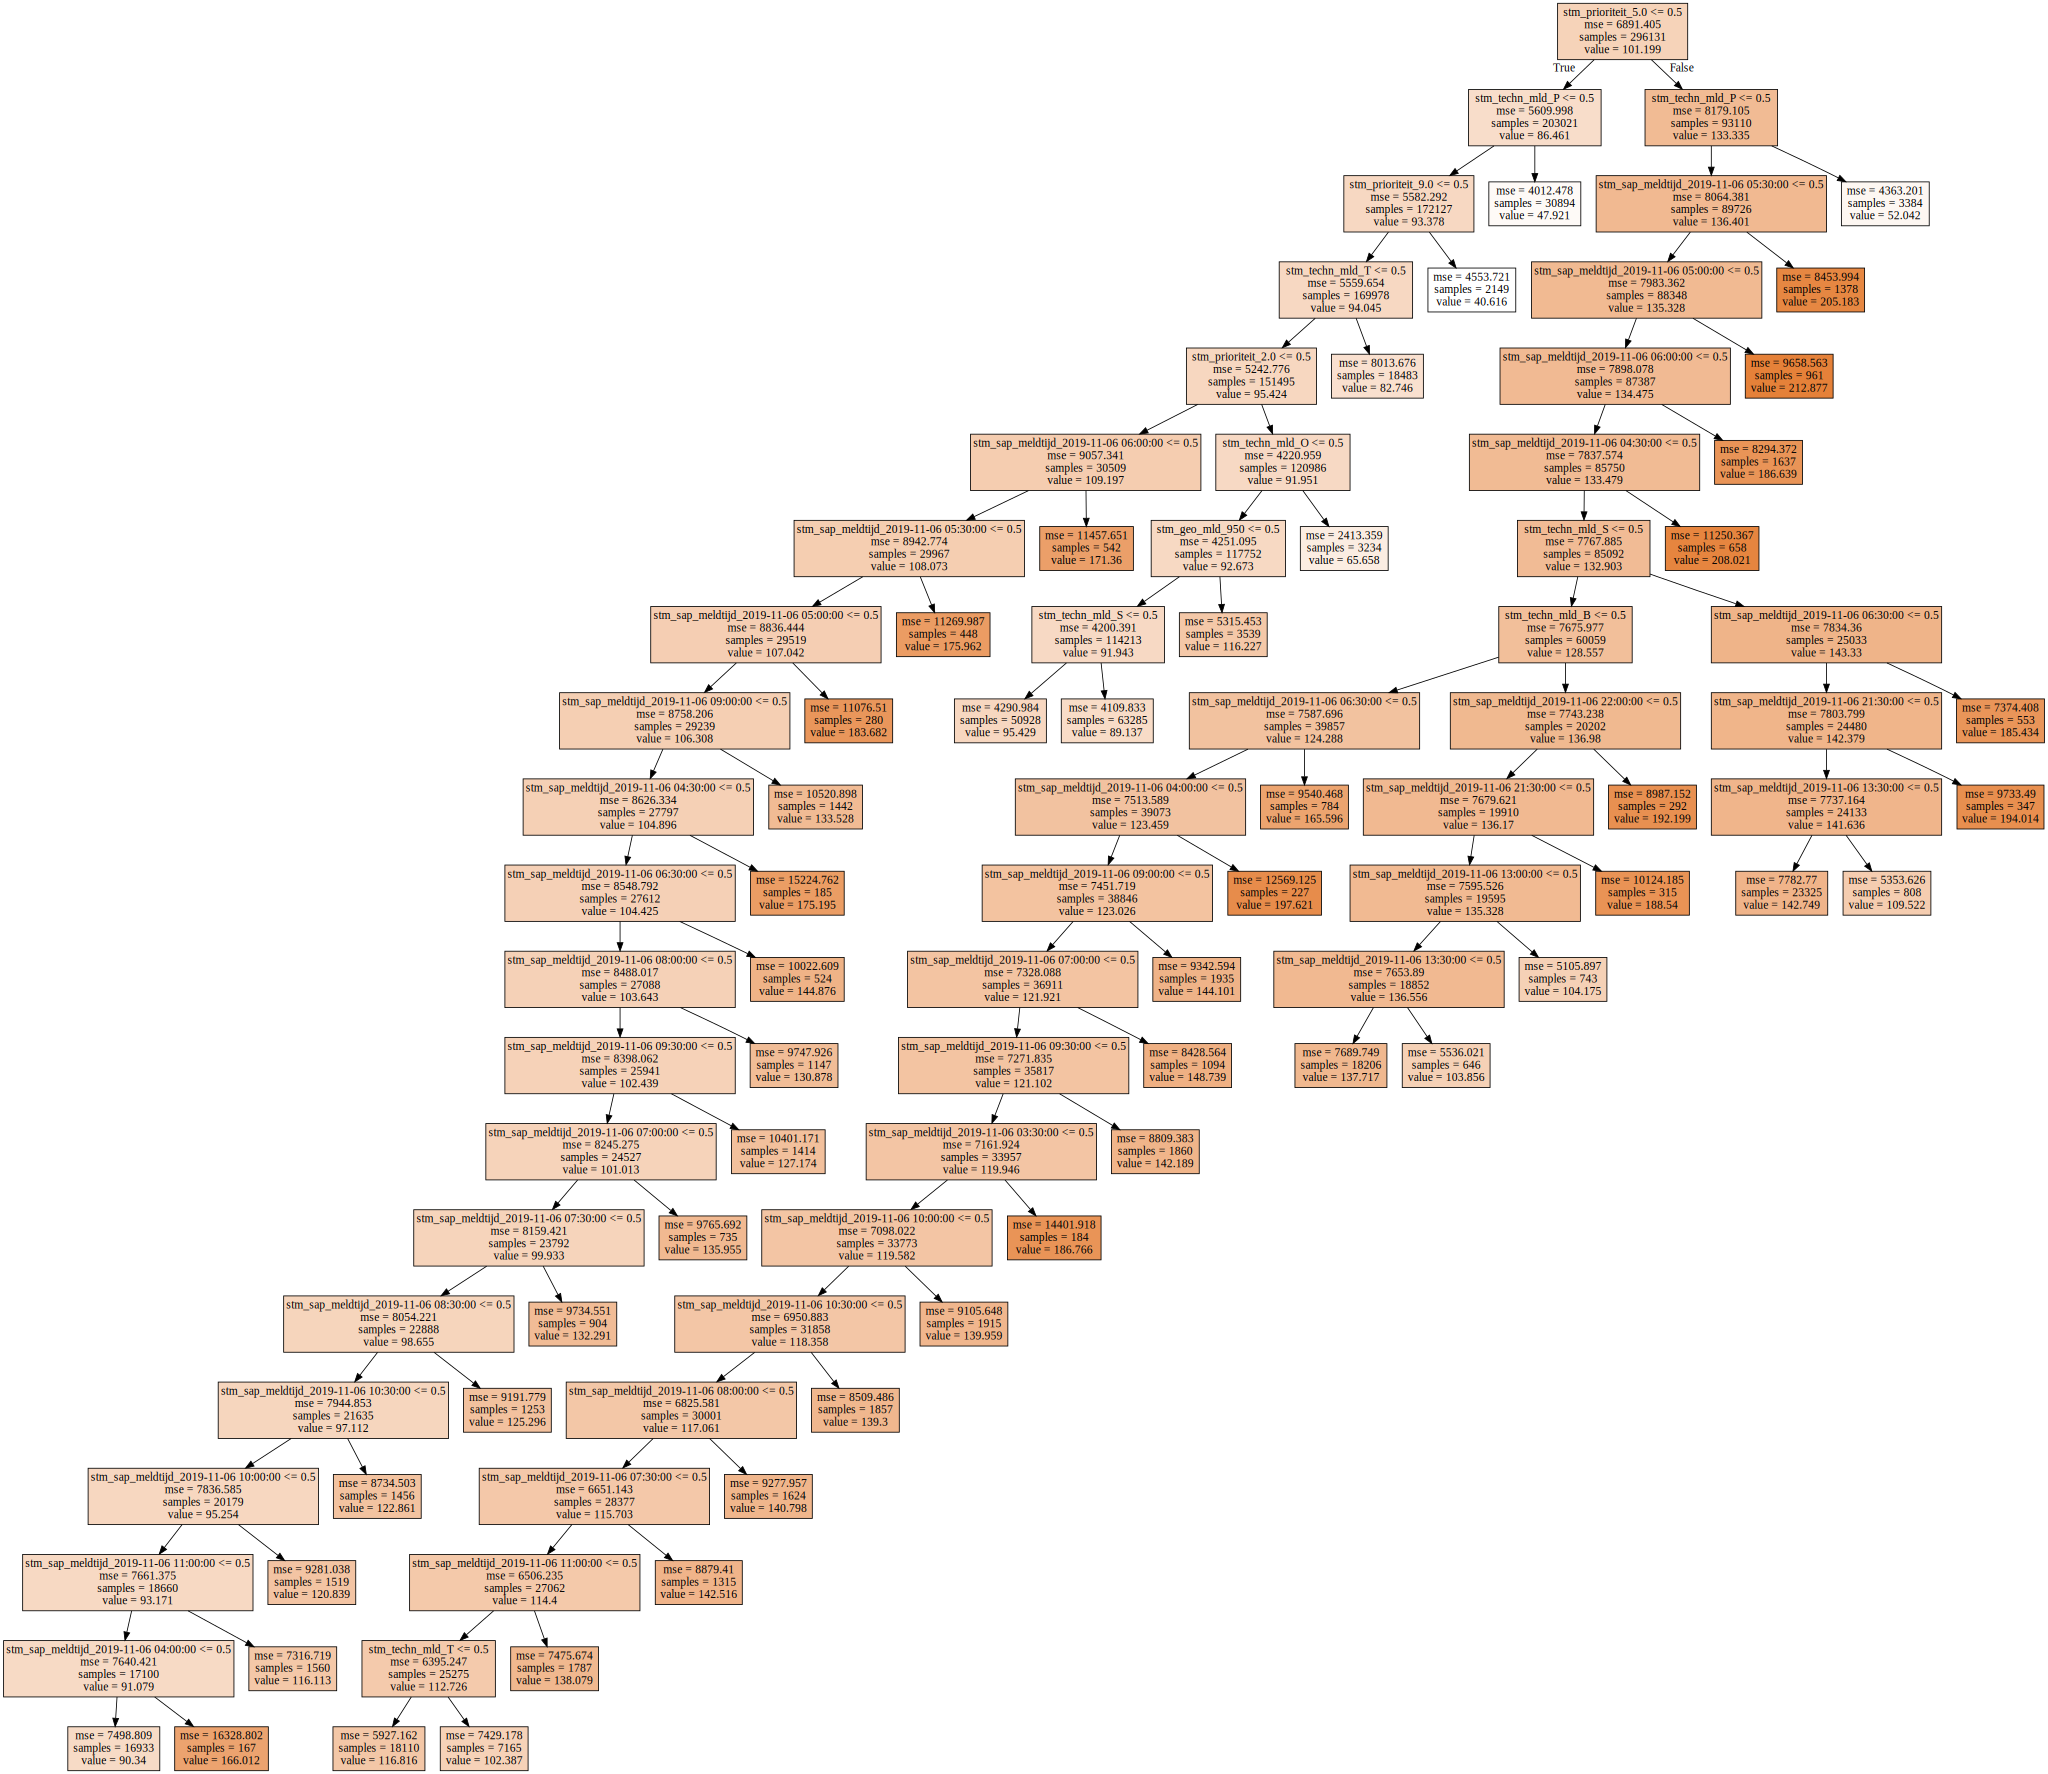

In [18]:
from sklearn import tree
from graphviz import Source # http://www.graphviz.org/download/
from IPython.display import SVG
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = Source( tree.export_graphviz(reg, out_file=None, feature_names=X.columns,filled=True))

from IPython.core.display import display, HTML
display(HTML('<style>svg{width:50%!important;height:50%!important;}</style>'))
SVG(graph.pipe(format='svg'))